In [170]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## (1) 데이터 가져오기

In [171]:
train = pd.read_csv('~/aiffel/bike_regression/bike-sharing-demand/train.csv')
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [172]:
a = pd.to_datetime(train['datetime'])

In [173]:
train['year'] = a.dt.year
train['month'] = a.dt.month
train['day'] = a.dt.day
train['hour'] = a.dt.hour
train['minute'] = a.dt.minute
train['second'] = a.dt.second


In [174]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

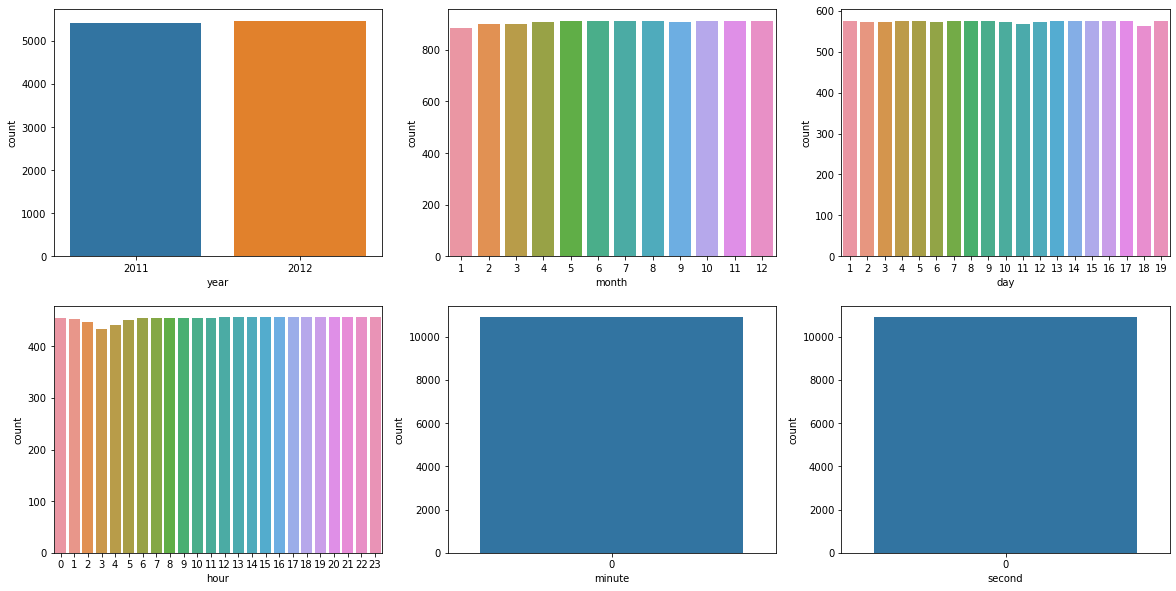

In [175]:
t = train[['year', 'month', 'day', 'hour', 'minute', 'second']]


figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,10)

sns.countplot(data=t, x="year", ax=ax1)
sns.countplot(data=t, x="month", ax=ax2)
sns.countplot(data=t, x="day", ax=ax3)
sns.countplot(data=t, x="hour", ax=ax4)
sns.countplot(data=t, x="minute", ax=ax5)
sns.countplot(data=t, x="second", ax=ax6)


## (4) X, y 컬럼 선택 및 train/test 데이터 분리

In [176]:
# minute와 second는 모두 0이라 제거하였다. casual과 registered역시 count와 직접적 관계이기 때문에 제거해야한다. 

temp = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity','windspeed', 'year', 'month', 'day', 'hour']]

X = temp.values
y = train['count'].values



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## (5) LinearRegression 모델 학습

In [177]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [178]:
prediction = model.predict(X_test)
print(prediction)

[248.10627003  48.79765547 200.90676727 ... 309.7528022   38.17030198
 243.62697388]


In [179]:
mse = mean_squared_error(y_test, prediction)
rmse = mse **0.5

print("mse : ", mse)
print("rmse : ", rmse)

mse :  19945.370053753755
rmse :  141.22807813517025


### MSE    : 19945.37
### RMSE  : 141.23 

## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

### 1. temp

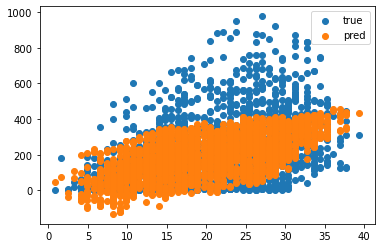

In [180]:
plt.scatter(X_test[:, 4], y_test, label="true")
plt.scatter(X_test[:, 4], prediction, label="pred")
plt.legend()
plt.show()

### 2. humidity

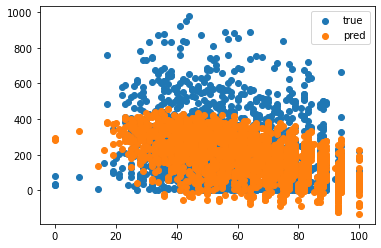

In [181]:
plt.scatter(X_test[:, 6], y_test, label="true")
plt.scatter(X_test[:, 6], prediction, label="pred")
plt.legend()
plt.show()

# Discussion

처음에 test데이터가 따로 주어져서 train데이터를 나누지 않고 했는데 대회 데이터셋이다 보니 test데이터에 count값, 즉 정답이 주어지지 않았었다. 그래서 그냥 train set을 8:2로 나눠서 train/test로 나누었다. 

columns 중 minutes & seconds가 둘다 0만 있는 열이라서 제거하였다. 처음에 test Set에 registered와 casual 열이 없어서 뭐지 오류인가?싶었는데 생각해보니 두 값의 합이 count, 즉 정답이라 없는거였다. 그래서 실험할 때 trainset에 그 두 열을 넣었더니 mse와 rmse가 0으로 수렴해버렸다. 어이 없는 실수였다..ㅎㅎ